In [9]:
import pandas as pd
df = pd.read_csv("log_fw_4.csv",sep=";",header=None)
df = df.drop(columns=9)
colonnes = ['date','ipsrc', 'ipdst','proto','portsrc','portdst','regle','action','interface','numtransp']
df.columns = colonnes
print(df.head())

                  date            ipsrc        ipdst proto  portsrc  portdst  \
0  2022-02-23 09:30:55   89.248.165.121  17.17.17.17   TCP  50242.0  25918.0   
1  2022-02-23 09:30:57  159.223.115.197  17.17.17.17   TCP  47162.0  24474.0   
2  2022-02-23 09:31:03   89.248.165.121  17.17.17.17   TCP  50242.0  23937.0   
3  2022-02-23 09:31:09    91.240.118.73  17.17.17.17   TCP  41839.0   1996.0   
4  2022-02-23 09:31:12    51.222.253.20  17.17.17.17   TCP  46712.0    443.0   

   regle  action interface  numtransp  
0  999.0    DENY      eth0        6.0  
1  999.0    DENY      eth0        6.0  
2  999.0    DENY      eth0        6.0  
3  999.0    DENY      eth0        6.0  
4    1.0  PERMIT      eth0        6.0  


In [10]:
''' See if there is missing data '''
print(df.isnull().sum())

date           0
ipsrc        301
ipdst        301
proto        301
portsrc      301
portdst      301
regle        301
action       301
interface    301
numtransp    301
dtype: int64


In [11]:
''' Remove the missing data '''
df = df.dropna()

In [18]:
df["date"]=pd.to_datetime(df["date"],format="%Y-%m-%d %H:%M:%S")


df['heure'] = df['date'].dt.hour
df["jour_semaine"]=df["date"].dt.dayofweek
pd.get_dummies("proto",prefix="proto",drop_first=True)




var_selection = ["heure", "jour_semaine","portdst","regle","portsrc"]

''' Create the X and y variables '''
X = df[var_selection]
y = df["action"]



In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

''' Create the decision tree model '''
model = DecisionTreeClassifier(max_depth=10,min_samples_leaf=2,min_samples_split=2)
model.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

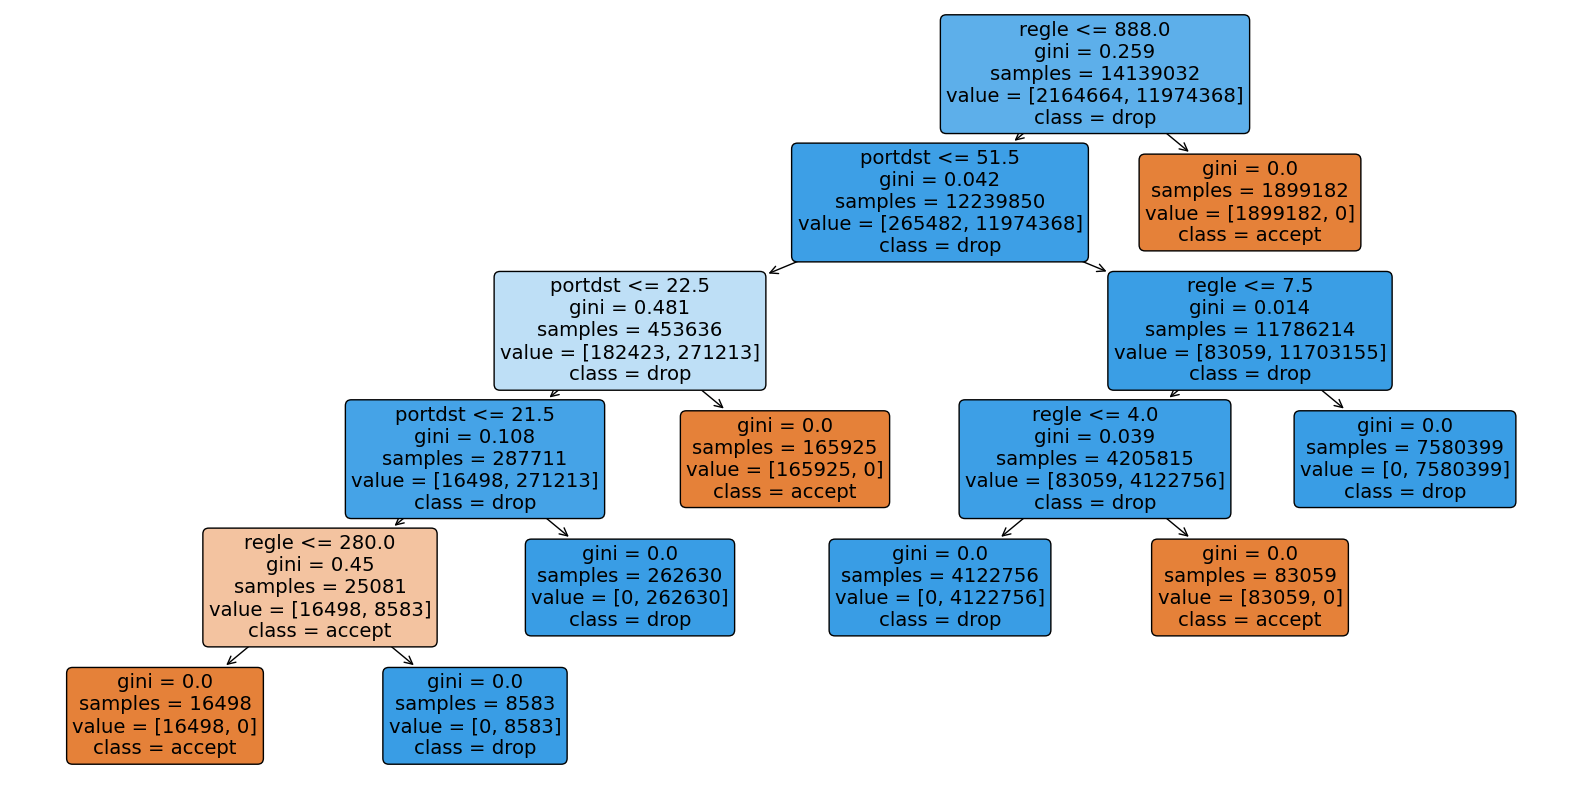

In [21]:
''' show the decision tree '''
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=var_selection, class_names=["accept","drop"], filled=True, rounded=True)
plt.show()


In [22]:

''' predict the test set results '''
y_pred = model.predict(X_test)

''' Evaluate the model '''
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred))

Accuracy:  1.0
Confusion matrix:  [[ 541187       0]
 [      0 2993571]]
